# First Notebook for dev issues
We basically reproduce setup.py and define functions or chech variables before updating either tempest/*.py or anything else really 

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/intro.yaml'

In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False)
gr = grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    pass

Data loaded from output/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Found grid attributes file , so loading output/intro/DYAMOND_SAM_ITCZ_intro/grid_attributes.pkl instead of computing


In [5]:
jd = joint_distrib.JointDistribution(gr, nd=3, overwrite = True, storm_tracking=True)

Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


# test Heavy diag 

In [9]:
ds = gr.get_var_id_ds("Prec")
ds

<xarray.Dataset>
Dimensions:            (lat_global: 20, lon_global: 30, days: 2)
Coordinates:
  * lat_global         (lat_global) int64 0 1 2 3 4 5 6 ... 13 14 15 16 17 18 19
  * lon_global         (lon_global) int64 0 1 2 3 4 5 6 ... 23 24 25 26 27 28 29
  * days               (days) object '16-08-31' '16-09-01'
Data variables:
    global_pixel_surf  (lat_global, lon_global, days) float64 ...
    max_Prec           (lat_global, lon_global, days) float64 ...
    mean_Prec          (lat_global, lon_global, days) float64 ...
    heavy_Prec         (lat_global, lon_global, days) float64 ...
    bis_mean_Prec      (lat_global, lon_global, days) float64 ...
    Alpha_95           (lat_global, lon_global, days) float64 ...
    Sigma_95           (lat_global, lon_global, days) float64 ...

In [18]:
# ds.max_Prec.shape
ds.heavy_Prec.shape

(20, 30, 2)

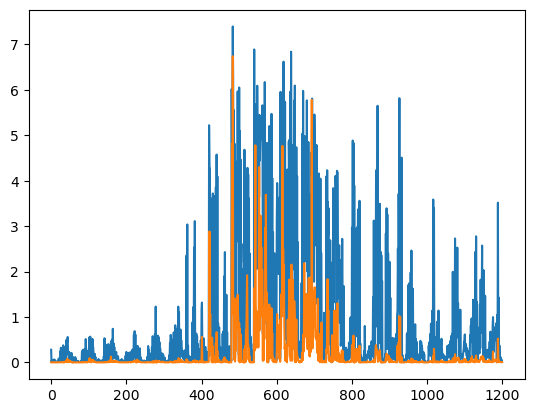

In [22]:
plt.plot(ds.max_Prec.values.flatten()/10)
plt.plot(ds.heavy_Prec.values.flatten())

## DO MCS_labels stuff from explore_conditional_multiscale_extremes.ipynb

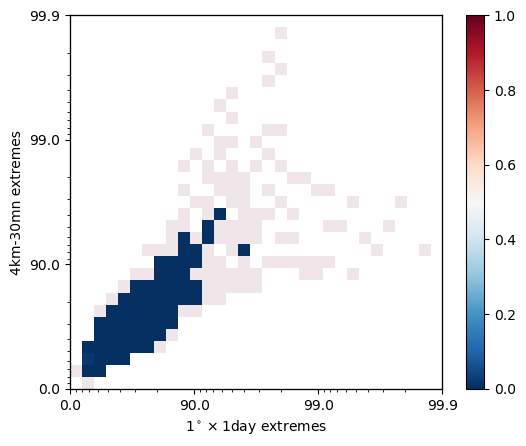

In [6]:
%matplotlib inline
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, False)

In [25]:
A_max = storm_attributes_on_jdist(jd, ['surfmaxkm2_172Wm2'], ['max'])
A_max = A_max[0][0,0]

0123456789101112131415161718192021222324252627282930

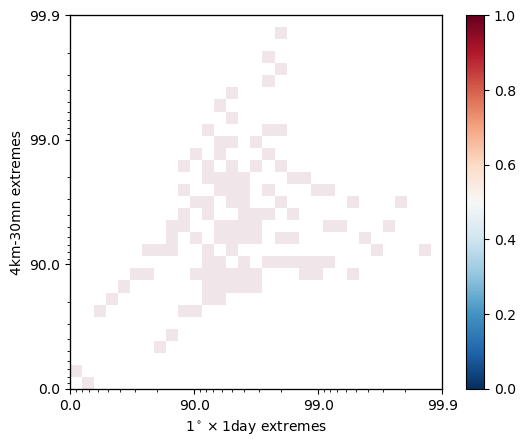

In [26]:
%matplotlib inline
data = A_max
jd.plot_data(data, noise, False)